In [102]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Load the dataset
dataset = pd.read_csv("Data/ev_charging_patterns.csv")
dataset

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,01/01/2024 0:00,01/01/2024 0:39,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,01/01/2024 1:00,01/01/2024 3:01,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,01/01/2024 2:00,01/01/2024 4:48,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,01/01/2024 3:00,01/01/2024 6:42,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,01/01/2024 4:00,01/01/2024 5:46,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,24/02/2024 19:00,24/02/2024 20:30,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,24/02/2024 20:00,24/02/2024 20:44,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,24/02/2024 21:00,24/02/2024 23:03,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,24/02/2024 22:00,24/02/2024 23:20,13.756251,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter


In [3]:
# Show the first few rows of the dataset
dataset.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,01/01/2024 0:00,01/01/2024 0:39,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,01/01/2024 1:00,01/01/2024 3:01,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,01/01/2024 2:00,01/01/2024 4:48,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,01/01/2024 3:00,01/01/2024 6:42,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,01/01/2024 4:00,01/01/2024 5:46,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [114]:
from sklearn.datasets import load_iris

# Load the dataset
dataset = load_iris()
X = dataset.data  # Feature matrix
y = dataset.target  # Target variable (labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")

Logistic Regression Accuracy: 1.00


In [6]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluate
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.2f}")


KNN Accuracy: 1.00


In [7]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)

# Evaluate
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naïve Bayes Accuracy: {nb_accuracy:.2f}")


Naïve Bayes Accuracy: 0.98


In [8]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")


Decision Tree Accuracy: 1.00


In [13]:
# Define features (X) and target (y)
X = dataset  # Features are the entire DataFrame
y = dataset.target  # Target is the 'target' from the dataset

In [52]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X_data = X['data']
y_data = X['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print("Training set shapes:", X_train.shape, y_train.shape)
print("Test set shapes:", X_test.shape, y_test.shape)


Training set shapes: (120, 4) (120,)
Test set shapes: (30, 4) (30,)


In [54]:

# Initialize the classifier
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [56]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

In [58]:

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}")
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.4f}\n")

Evaluating Logistic Regression...
Confusion Matrix for Logistic Regression:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy for Logistic Regression: 1.0000

Evaluating Decision Tree...
Confusion Matrix for Decision Tree:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy for Decision Tree: 1.0000

Evaluating Random Forest...
Confusion Matrix for Random Forest:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy for Random Forest: 1.0000

Evaluating SVC...
Confusion Matrix for SVC:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy for SVC: 1.0000

Evaluating k-NN...
Confusion Matrix for k-NN:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy for k-NN: 1.0000

Evaluating Naive Bayes...
Confusion Matrix for Naive Bayes:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy for Naive Bayes: 1.0000



In [60]:
# Initialize classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression()
}

In [62]:

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    

Model: RandomForest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Model: SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Model: DecisionTree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00 

In [66]:
# Cleaning the data (e.g., dropping rows with missing values)
ev_data = pd.read_csv('Data/ev_charging_patterns.csv')

ev_data_cleaned = ev_data.dropna()

# Checking for missing values
print(ev_data_cleaned.isnull().sum())

User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64


In [88]:
ev_data_cleaned.loc[:, 'Energy Consumed (kWh)'] = ev_data_cleaned['Energy Consumed (kWh)'].fillna(ev_data_cleaned['Energy Consumed (kWh)'].median())
ev_data_cleaned.loc[:, 'Charging Rate (kW)'] = ev_data_cleaned['Charging Rate (kW)'].fillna(ev_data_cleaned['Charging Rate (kW)'].median())
ev_data_cleaned.loc[:, 'Distance Driven (since last charge) (km)'] = ev_data_cleaned['Distance Driven (since last charge) (km)'].fillna(ev_data_cleaned['Distance Driven (since last charge) (km)'].median())


In [96]:
ev_data_cleaned = ev_data_cleaned.copy()

In [98]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)


KMeans(n_clusters=3, random_state=42)

In [104]:

# Select the features for clustering
features = ev_data_cleaned[['Energy Consumed (kWh)', 'Charging Duration (hours)']]


In [106]:
# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [108]:
# Apply  Clustering (Hierarchical Clustering)
# We will specify n_clusters=3 here, but you can change this based on your analysis.
agg_clust = AgglomerativeClustering(n_clusters=3)
ev_data_cleaned['Cluster_Hierarchical'] = agg_clust.fit_predict(features_scaled)


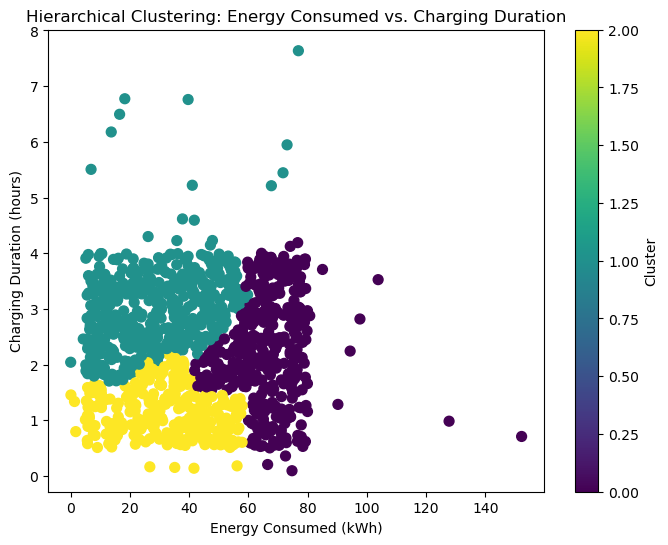

In [110]:
# display the clusters
plt.figure(figsize=(8, 6))
plt.scatter(ev_data_cleaned['Energy Consumed (kWh)'], ev_data_cleaned['Charging Duration (hours)'], 
            c=ev_data_cleaned['Cluster_Hierarchical'], cmap='viridis', s=50)
plt.title('Hierarchical Clustering: Energy Consumed vs. Charging Duration')
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Charging Duration (hours)')
plt.colorbar(label='Cluster')
plt.show()

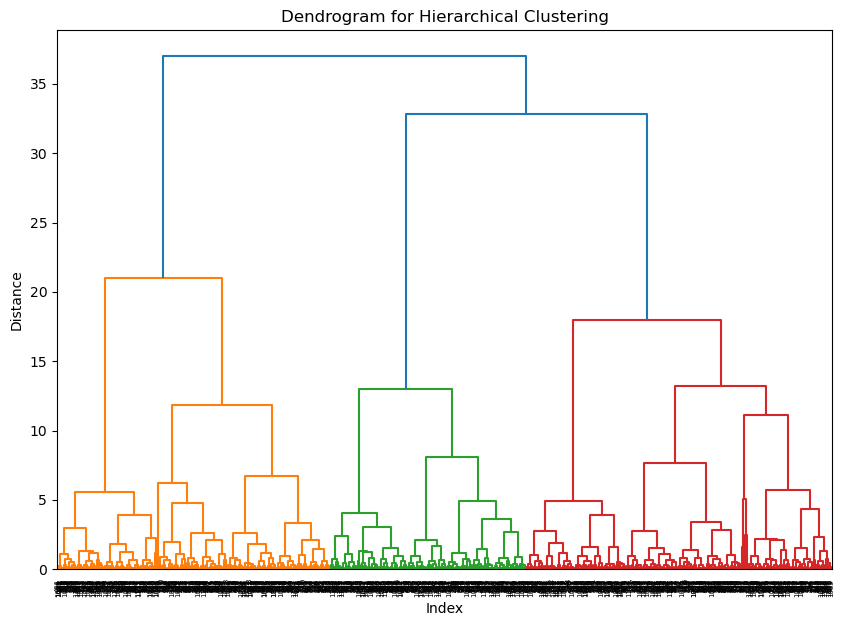

In [112]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform the linkage
Z = linkage(features_scaled, method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()